In [1]:
%pip install geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 12.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 8.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Instalação das LIBs necessárias para o projeto

In [2]:
import geopandas as gpd
import matplotlib

In [10]:
path_list = ['BR_Municipios_2022/BR_Municipios_2022.shp', 'BR_Rodovias_2022/Rodovias_estaduais_sre.shp', 'BR_Aeroportos_2022/AEROPORTOS.shp']
dados = [gpd.read_file(path) for path in path_list]

In [41]:
municipios_filter = dados[0][dados[0]['SIGLA_UF'] == 'SP']

In [42]:
municipios_filter

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3267,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
3268,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
3269,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3270,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
3271,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."
...,...,...,...,...,...
3907,3557006,Votorantim,SP,184.186,"POLYGON ((-47.42427 -23.52420, -47.42425 -23.5..."
3908,3557105,Votuporanga,SP,420.703,"POLYGON ((-49.98320 -20.57103, -49.98408 -20.5..."
3909,3557154,Zacarias,SP,319.056,"POLYGON ((-49.98507 -21.05306, -49.98518 -21.0..."
3910,3557204,Chavantes,SP,188.727,"POLYGON ((-49.72713 -23.10799, -49.72833 -23.1..."


<Axes: >

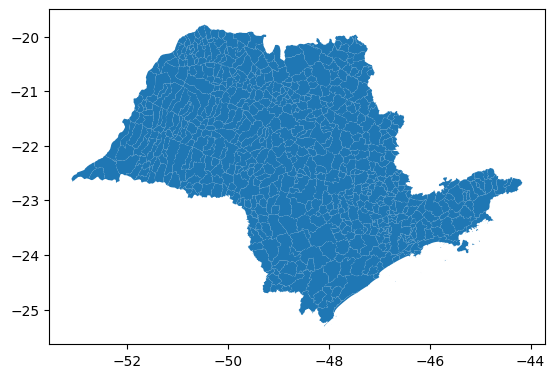

In [43]:
municipios_filter.plot()

In [44]:
rodovias = gpd.overlay(dados[1], municipios_filter, how='intersection')

In [45]:
rodovias.head()

,OBJECTID_1,OBJECTID,ROD_KM_INI,ROD_KM_FIN,ROD_KM_EXT,SNV_ROD_CO,UF_SIGLA,ROD_ADM_NO,ROD_CODIGO,SNV_ROD_SU,...,ROD_FON_DE,br,filtro_lab,Shape_Leng,Shape_STLe,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1881,2810,0.0,0.0,0.0,S/I,MG,Estadual,MG-444,Pavimentada,...,Mapa DNIT 2002,444,NaN,0.195209,0.195209,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.11182 -20.63046, -47.11265 -20..."
1,12749,17879,0.0,0.0,0.0,S/I,SP,Estadual,SP-011/345,Pavimentada,...,Mapa DER 2006,345,NaN,0.011291,0.011291,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.21187 -20..."
2,12770,17905,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,Mapa DER 2006,345,NaN,0.099244,0.099244,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.20682 -20.63135, -47.20555 -20..."
3,12772,17907,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,Mapa DER 2006,345,NaN,0.078179,0.078179,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.22194 -20..."
4,14240,19665,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,Mapa DER 2006,345,NaN,0.006093,0.006093,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.20682 -20..."


<Axes: >

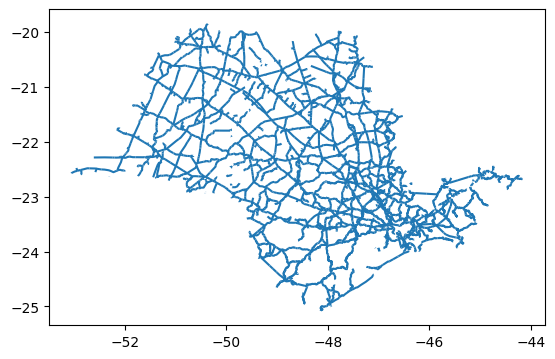

In [46]:
rodovias.plot()

In [47]:
rodovias['extensao_km'] = rodovias['geometry'].to_crs(epsg=5880).length / 1000
rodovias.head()

,OBJECTID_1,OBJECTID,ROD_KM_INI,ROD_KM_FIN,ROD_KM_EXT,SNV_ROD_CO,UF_SIGLA,ROD_ADM_NO,ROD_CODIGO,SNV_ROD_SU,...,br,filtro_lab,Shape_Leng,Shape_STLe,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,extensao_km
0,1881,2810,0.0,0.0,0.0,S/I,MG,Estadual,MG-444,Pavimentada,...,444,NaN,0.195209,0.195209,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.11182 -20.63046, -47.11265 -20...",0.089727
1,12749,17879,0.0,0.0,0.0,S/I,SP,Estadual,SP-011/345,Pavimentada,...,345,NaN,0.011291,0.011291,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.21187 -20...",1.231628
2,12770,17905,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,345,NaN,0.099244,0.099244,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.20682 -20.63135, -47.20555 -20...",10.415025
3,12772,17907,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,345,NaN,0.078179,0.078179,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.22194 -20...",1.088131
4,14240,19665,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,345,NaN,0.006093,0.006093,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.20682 -20...",0.641890


In [48]:
aeroportos = gpd.sjoin(dados[2], municipios_filter, how='inner', op='within')
aeroportos.head()

/home/jose/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,OBJECTID,CODIGO,AEROPORTO,AEROPORTO_,LAT,LONG,CLASSIFICA,CARGA2000,PASSAGEIRO,CARGA2001,...,PASSAGE_17,CARGA2018,PASSAGE_18,MAPA_OSM,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
0,1,SBGR,SÃO PAULO - GUARULHOS,SÃO PAULO - GUARULHOS,23° 26' 8'' S,46° 28' 23'' W,Concedido,223342682.0,6095886.0,215274843.0,...,18744930.0,329644465.0,20922500.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-46.47306 -23.43556),3479,3518800,Guarulhos,SP,318.675
1,2,SBSP,SÃO PAULO - CONGONHAS,SÃO PAULO - CONGONHAS,23° 37' 34'' S,46° 39' 23'' W,Não Concedido,25567897.0,5314615.0,29601126.0,...,10795870.0,35906636.0,11063459.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-46.65639 -23.62611),3829,3550308,São Paulo,SP,1521.202
5,6,SBKP,CAMPINAS,CAMPINAS,23° 0' 25'' S,47° 8' 4'' W,Concedido,46509045.0,401487.0,54913402.0,...,4622723.0,122316532.0,4583906.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-47.13444 -23.00694),3375,3509502,Campinas,SP,794.571
128,129,SDAM,CAMPINAS,CAMPINAS,22° 51' 33'' S,47° 6' 29'' W,Não Concedido,0.0,0.0,0.0,...,0.0,0.0,0.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-47.10806 -22.85917),3375,3509502,Campinas,SP,794.571
28,29,SBRP,RIBEIRÃO PRETO,RIBEIRÃO PRETO,21° 8' 11'' S,47° 46' 36'' W,Não Concedido,1390887.0,221537.0,1376485.0,...,469518.0,454632.0,451295.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-47.77667 -21.13639),3754,3543402,Ribeirão Preto,SP,650.916


<Axes: >

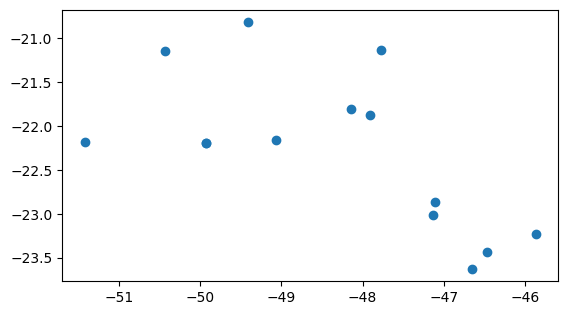

In [49]:
aeroportos.plot()

In [50]:
rodovias.head()

,OBJECTID_1,OBJECTID,ROD_KM_INI,ROD_KM_FIN,ROD_KM_EXT,SNV_ROD_CO,UF_SIGLA,ROD_ADM_NO,ROD_CODIGO,SNV_ROD_SU,...,br,filtro_lab,Shape_Leng,Shape_STLe,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,extensao_km
0,1881,2810,0.0,0.0,0.0,S/I,MG,Estadual,MG-444,Pavimentada,...,444,NaN,0.195209,0.195209,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.11182 -20.63046, -47.11265 -20...",0.089727
1,12749,17879,0.0,0.0,0.0,S/I,SP,Estadual,SP-011/345,Pavimentada,...,345,NaN,0.011291,0.011291,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.21187 -20...",1.231628
2,12770,17905,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,345,NaN,0.099244,0.099244,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.20682 -20.63135, -47.20555 -20...",10.415025
3,12772,17907,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,345,NaN,0.078179,0.078179,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.22194 -20...",1.088131
4,14240,19665,0.0,0.0,0.0,S/I,SP,Estadual,SP-345,Pavimentada,...,345,NaN,0.006093,0.006093,3523701,Itirapuã,SP,161.118,"LINESTRING (-47.21243 -20.62897, -47.20682 -20...",0.641890
